# <font color='#EB365D'> HEART FAILURE PREDICTION </font>
***

<font color='blue'>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.</font>

_______

<font color = 'rgb(33, 75, 99)'><b>Author of this Notebook:</b></font>
<b>Rudra Narayan Mishra</b>

<font color = '#FF16A7'><h2>Columns Used In This Dataset: </h2></font>
<ol>
  <li><font color = '#FF173D'><b>Age:</b></font>age of the patient</li>
  <li><font color = '#FF173D'><b>anaemia:</b></font>Decrease of red blood cells or hemoglobin (boolean)</li>
  <li><font color = '#FF173D'><b>creatinine_phosphokinase:</b></font>Level of the CPK enzyme in the blood (mcg/L)</li>
  <li><font color = '#FF173D'><b>diabetes:</b></font>If the patient has diabetes (boolean)</li>
  <li><font color = '#FF173D'><b>ejection_fraction:</b></font>Percentage of blood leaving the heart at each contraction (percentage)</li>
  <li><font color = '#FF173D'><b>high_blood_pressure:</b></font>If the patient has hypertension (boolean)</li>
  <li><font color = '#FF173D'><b>platelets:</b></font>Platelets in the blood (kiloplatelets/mL)</li>
  <li><font color = '#FF173D'><b>serum_creatinine:</b></font>Level of serum creatinine in the blood (mg/dL)</li>
  <li><font color = '#FF173D'><b>serum_sodium:</b></font>Level of serum sodium in the blood (mEq/L)</li>
  <li><font color = '#FF173D'><b>sex:</b></font>Woman or man (binary)</li>
  <li><font color = '#FF173D'><b>smoking:</b></font>If the patient smokes or not (boolean)</li>
  <li><font color = '#FF173D'><b>time:</b></font>Follow-up period (days)</li>
  <li><font color = '#FF173D'><b>DEATH_EVENT:</b></font>If the patient deceased during the follow-up period (boolean)</li>
</ol>
    

***
## <font color = "#B339A2"> Importing Libraries </font>
***

In [1]:
# basic python libraries
import pandas as pd
import numpy as np
import matplotlib
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from matplotlib import cm
from collections import OrderedDict
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (15, 5)
from scipy.stats import norm, shapiro
from scipy import stats


# sklearn libraries
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import GridSearchCV

# feature selection library
from mlxtend.feature_selection import SequentialFeatureSelector

# model building libraries
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier,StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier

# warning library
import warnings
warnings.filterwarnings("ignore")

# setting basic options
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# color maps
greens = sns.light_palette("green", as_cmap=True)
purples = sns.light_palette("purple", as_cmap=True)
blues = sns.light_palette("blue", as_cmap=True)
# Define color sets of paintings
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
sunflowers_colors = ['rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)']
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
cafe_colors =  ['rgb(146, 123, 21)', 'rgb(177, 180, 34)', 'rgb(206, 206, 40)',
                'rgb(175, 51, 21)', 'rgb(35, 36, 21)']

***
## <font color = "#BD2CF6"> Importing Dataset</font>
***

In [3]:
# importing dataset
data = pd.read_csv(r"input/heart_failure_clinical_records_dataset.csv", error_bad_lines = False)
print("Shape of the data is {}.".format(data.shape))

Shape of the data is (299, 13).


In [4]:
data.head().style.background_gradient(cmap=purples)

***
## <font color = "#992CF6">Basic Analysis</font>
***

In [5]:
# getting the death event distribution
labels = data.DEATH_EVENT.value_counts(normalize = True)*100 
fig = px.pie(labels, values= 'DEATH_EVENT', names = ['Alive', 'Dead'], title='Target Distribution across whole dataset')
fig.show()

The data is slightly imbalanced. So, we will split the dataset using StratifiedShuffleSplit(), so as to have the same level of imbalanced ratio in both train and test set.

***
## <font color = "#FF1DBB">Train Test Split</font>
***

In [6]:
# Stratified Shuffle Train Test Split
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.15 ,random_state = 42) #2-fold cross validation
for train_index, test_index in sss.split(data.iloc[:, :-1], data.iloc[:,-1]):
    print("Intersection of train index and test index:", list(set(train_index) & set(test_index)))
    train = data.iloc[train_index, :]
    test = data.iloc[test_index, :]
    print("Shape of train data is {}".format(train.shape))
    print("Shape of test data is {}".format(test.shape))

Intersection of train index and test index: []
Shape of train data is (254, 13)
Shape of test data is (45, 13)


In [7]:
# getting the death event distribution in train set
train_labels = train.DEATH_EVENT.value_counts(normalize = True)*100 
test_labels = test.DEATH_EVENT.value_counts(normalize = True)*100 

# Create subplots, using 'domain' type for pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Train Target', 'Test Target'])
labels = ["Alive", "Dead"]

# Define pie charts
fig.add_trace(go.Pie(labels=labels, values=train_labels, name="Train target", scalegroup='one',
                     marker_colors=night_colors), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=test_labels, name='Test Target', scalegroup='one',
                     marker_colors=cafe_colors), 1, 2)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='percent+label')
fig.update(layout_title_text='Distribution of target values across train and test set respectively',
          layout_showlegend=False)

fig = go.Figure(fig)
fig.show()

Now, we can see that the StratifiedShuffleSplit() did a great help in splitting the train and test set according to our needs.

***
## <font color = 'blue'>Exploratory Data Analysis</font>
***         

In [8]:
# checking for null values in train set
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<font color = 'green'>There is no null value present in train set.</font>

In [9]:
# checking for null values in test set
test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<font color = 'green'>There is no null value present in test set.</font>

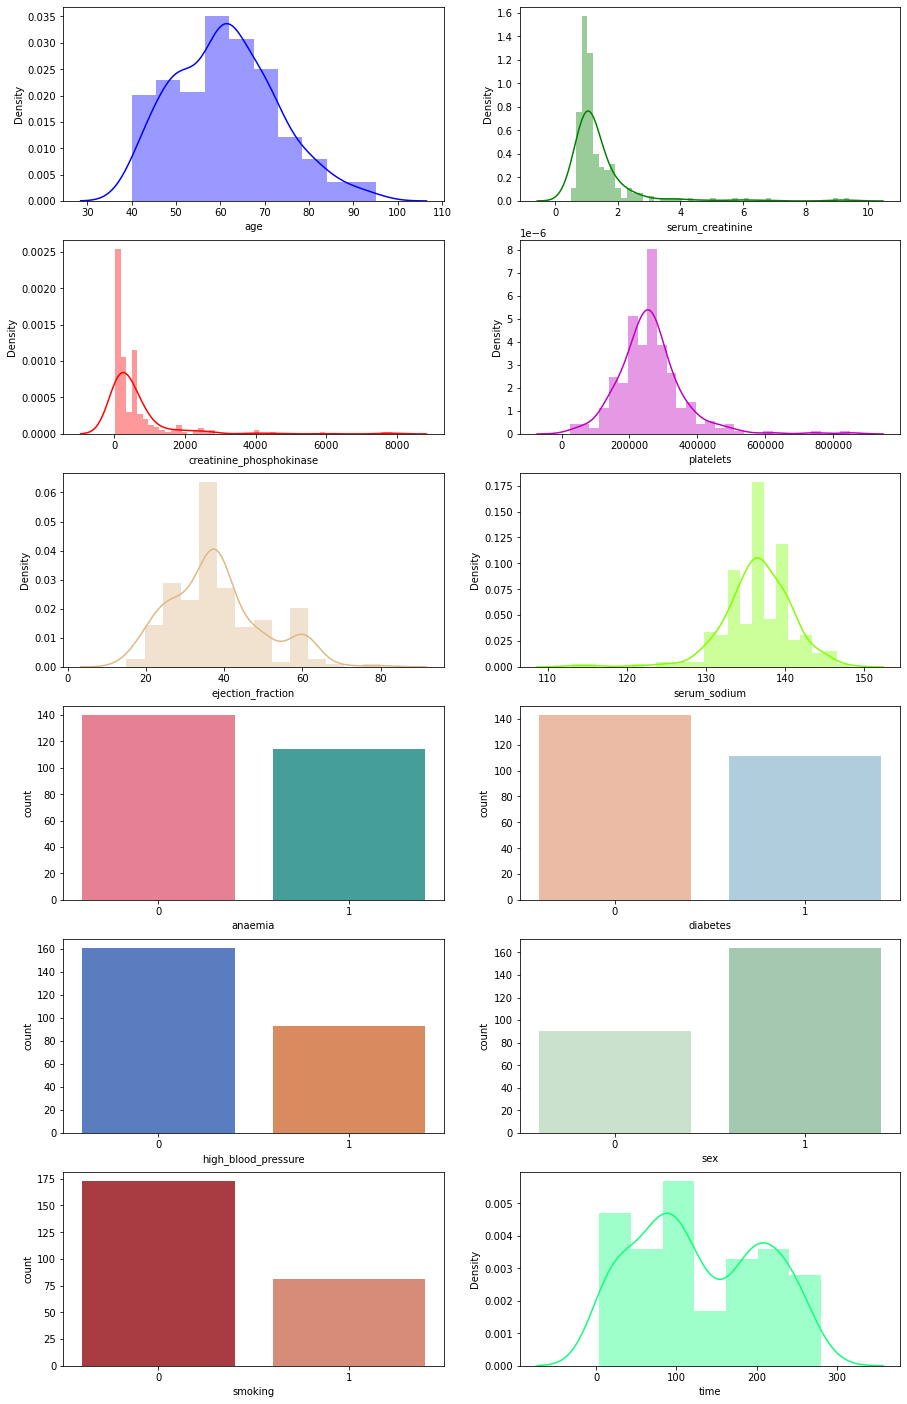

In [10]:
# distribution of column values
f,ax = plt.subplots(6,2,figsize=(15,25))
sns.distplot(train['age'].dropna(),ax=ax[0,0],kde=True,color='b')
sns.distplot(train['serum_creatinine'].dropna(),ax=ax[0,1],kde=True,color='g')
sns.distplot(train['creatinine_phosphokinase'].dropna(),ax=ax[1,0],kde=True,color='r')
sns.distplot(train['platelets'].dropna(),ax=ax[1,1],kde=True,color='m')
sns.distplot(train['ejection_fraction'].dropna(),ax=ax[2,0],kde=True,color='burlywood')
sns.distplot(train['serum_sodium'].dropna(),ax=ax[2,1],kde=True,color='chartreuse')
sns.countplot('anaemia',data=train,ax=ax[3,0], palette='husl')
sns.countplot('diabetes',data=train,ax=ax[3,1], palette='RdBu')
sns.countplot('high_blood_pressure',data=train,ax=ax[4,0], palette=sns.color_palette("muted"))
sns.countplot('sex',data=train,ax=ax[4,1], palette=sns.color_palette("ch:2.5,-.2,dark=.3"))
sns.countplot('smoking',data=train,ax=ax[5,0], palette=sns.color_palette("RdBu", n_colors=7))
sns.distplot(train['time'],kde = True,ax=ax[5,1], color = '#0FFF7C')

__AGE__

In [11]:
# describing age
train.age.describe().to_frame().style.background_gradient(cmap=greens)

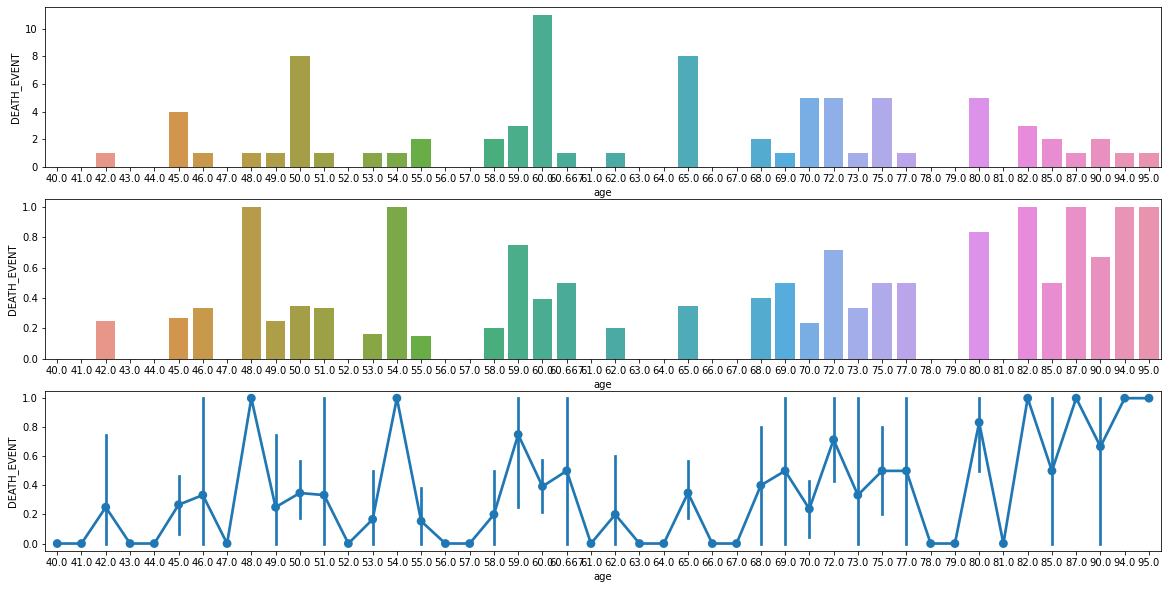

In [12]:
sum_Age = train[["age", "DEATH_EVENT"]].groupby(['age'],as_index=False).sum()
avg_Age = train[["age", "DEATH_EVENT"]].groupby(['age'],as_index=False).mean()

# plotting the dataframes
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(20,10))
sns.barplot(x='age', y='DEATH_EVENT', data=sum_Age, ax = axis1)
sns.barplot(x='age', y='DEATH_EVENT', data=avg_Age, ax = axis2)
sns.pointplot(x = 'age', y = 'DEATH_EVENT', data=train, ax = axis3)

There is a very little pattern in this scenario so I will bin the age column according to quantile range.

In [13]:
# bin the age according to the quantiles
train['age_bin'] = pd.qcut(train['age'], q=4, labels = [0,1,2,3])
test['age_bin'] = pd.qcut(test['age'], q=4, labels = [0,1,2,3])
print("Shape of train is: ", train.shape)
print("Shape of test is: ", test.shape)

Shape of train is:  (254, 14)
Shape of test is:  (45, 14)


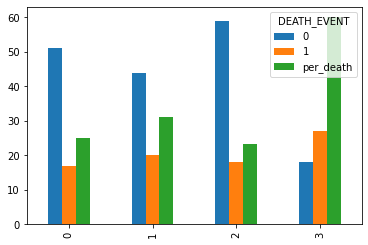

In [14]:
# getting the distribution
age_dist = train.groupby(['age_bin', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0).reset_index()
age_dist['per_death'] = age_dist[1]/(age_dist[0]+age_dist[1])*100
age_dist.plot(kind = 'bar')

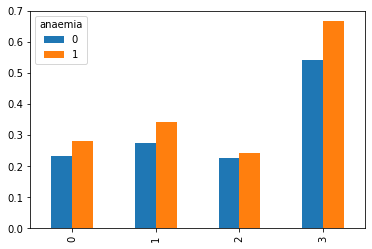

In [15]:
# distribution of anaemia with age
anaemia_grp = train.groupby(['age_bin', 'anaemia'])['DEATH_EVENT'].mean().unstack().reset_index()
anaemia_grp.plot(kind = 'bar')

__ANAEMIA__

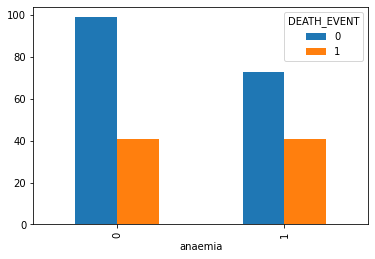

In [16]:
# distribution of anamenia and DEATH_EVENT
anaemia_grp = train.groupby(['anaemia', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack()
anaemia_grp.plot(kind='bar')

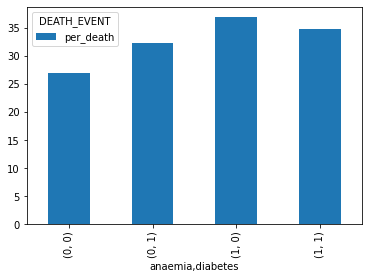

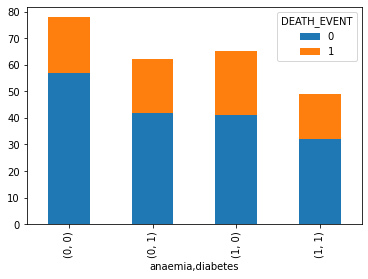

In [17]:
# getting the distribution
dist = train.groupby(['anaemia','diabetes', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

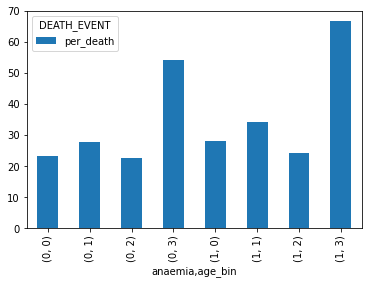

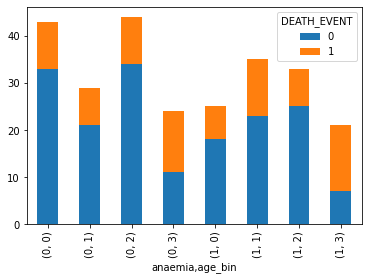

In [18]:
# getting the distribution
dist = train.groupby(['anaemia','age_bin', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

__creatinine_phosphokinase__

In [19]:
# description of creatinine_phosphokinase
train.creatinine_phosphokinase.describe().to_frame().style.background_gradient(cmap='viridis')

Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)

In [20]:
# making a column for having normal range
train['normal_creatinine_phosphokinase'] = train['creatinine_phosphokinase'].apply(lambda x: 1 if (x > 10 and x <=120) else 0)
test['normal_creatinine_phosphokinase'] = test['creatinine_phosphokinase'].apply(lambda x: 1 if (x > 10 and x <=120) else 0)

In [21]:
# quantile binning
train['creatinine_phosphokinase_bin'] = pd.qcut(train['creatinine_phosphokinase'], q=4, labels = [0,1,2,3])
test['creatinine_phosphokinase_bin'] = pd.qcut(test['creatinine_phosphokinase'], q=4, labels = [0,1,2,3])

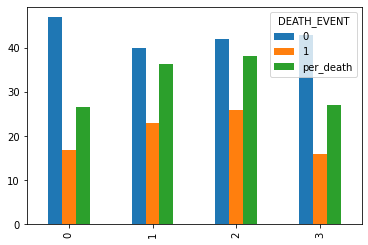

In [22]:
# getting the distribution
dist = train.groupby(['creatinine_phosphokinase_bin', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0).reset_index()
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist.plot(kind = 'bar')

In [23]:
# getting the distribution
dist = train.groupby(['normal_creatinine_phosphokinase', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0).reset_index()
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist

DEATH_EVENT  normal_creatinine_phosphokinase    0   1  per_death
0                                          0  124  65  34.391534
1                                          1   48  17  26.153846

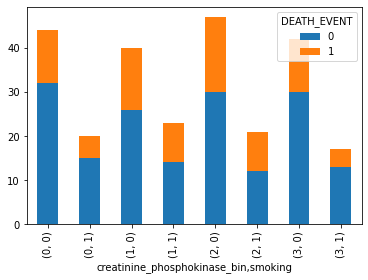

In [24]:
# getting the distribution
dist = train.groupby(['creatinine_phosphokinase_bin','smoking', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist.plot(kind='bar', stacked = True)

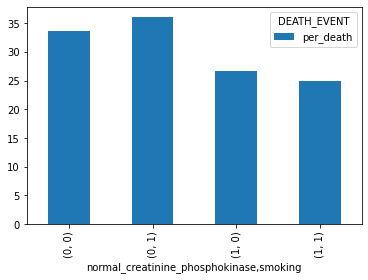

In [25]:
# getting the distribution
dist = train.groupby(['normal_creatinine_phosphokinase','smoking', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')

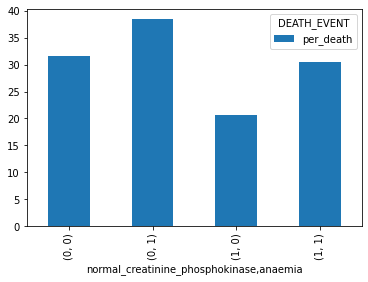

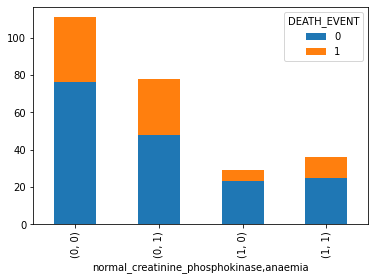

In [26]:
# getting the distribution
dist = train.groupby(['normal_creatinine_phosphokinase','anaemia', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

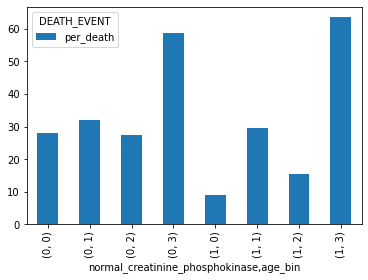

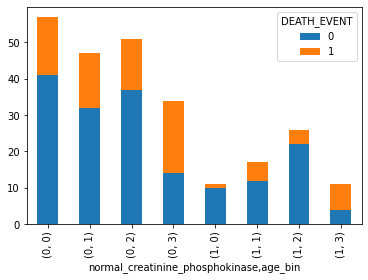

In [27]:
# getting the distribution
dist = train.groupby(['normal_creatinine_phosphokinase','age_bin', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

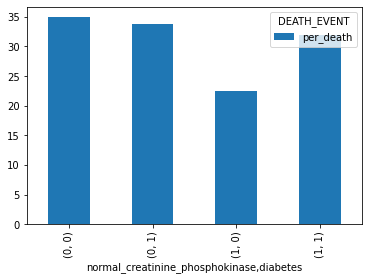

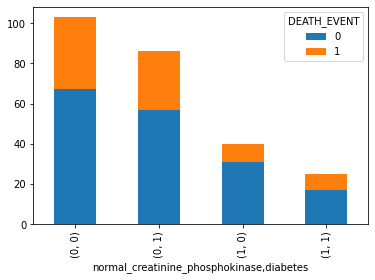

In [28]:
# getting the distribution
dist = train.groupby(['normal_creatinine_phosphokinase','diabetes', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

__diabetes__

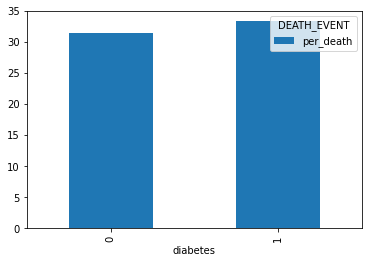

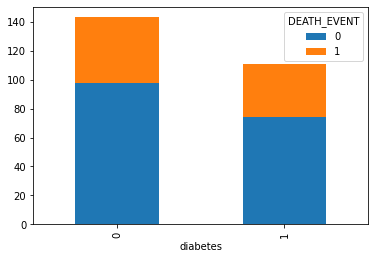

In [29]:
# getting the distribution
dist = train.groupby(['diabetes', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

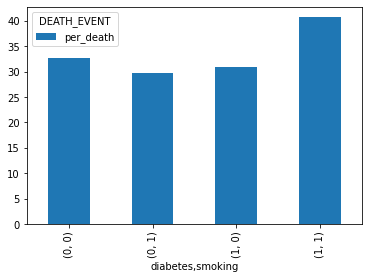

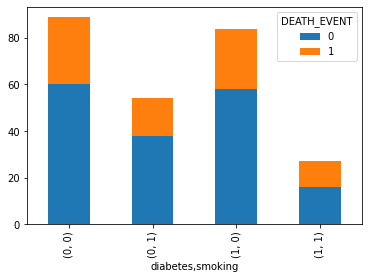

In [30]:
# getting the distribution
dist = train.groupby(['diabetes','smoking', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

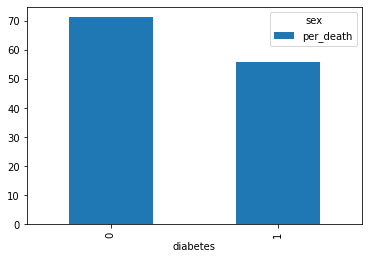

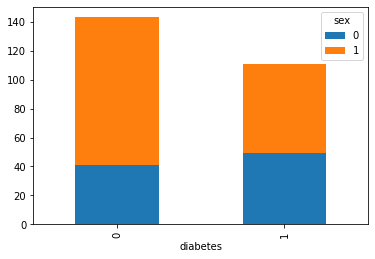

In [31]:
# getting the distribution
dist = train.groupby(['diabetes', 'sex'])['sex'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

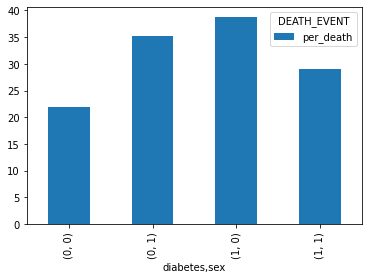

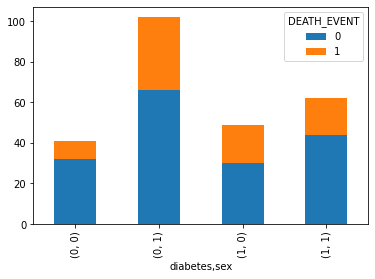

In [32]:
# getting the distribution
dist = train.groupby(['diabetes','sex', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

In [33]:
dist = train.groupby(['diabetes','high_blood_pressure', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

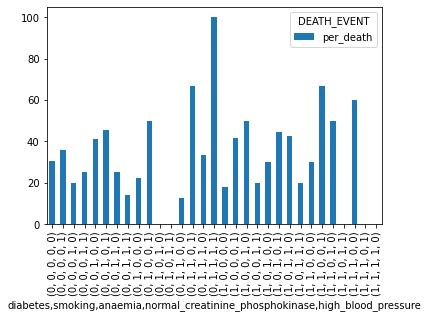

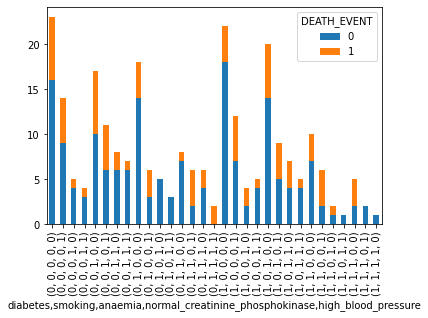

In [34]:
# getting the distribution
dist = train.groupby(['diabetes', 'smoking','anaemia', 'normal_creatinine_phosphokinase','high_blood_pressure', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

__ejection_fraction__

In [35]:
# describe
train.ejection_fraction.describe().to_frame().style.background_gradient(cmap='PuBuGn')

After getting some insights from the internet about this particular column regarding heart failure, I found that: 

Ejection Fraction (EF) 55% to 70%

Pumping Ability of the Heart: Normal.
Level of Heart Failure/Effect on Pumping: Heart function may be normal or you may have heart failure with preserved EF (HF-pEF).
Ejection Fraction (EF) 40% to 54%

Pumping Ability of the Heart: Slightly below normal.
Level of Heart Failure/Effect on Pumping: Less blood is available so less blood is ejected from the ventricles. There is a lower-than-normal amount of oxygen-rich blood available to the rest of the body. You may not have symptoms.
Ejection Fraction (EF) 35% to 39%

Pumping Ability of the Heart: Moderately below normal.
Level of Heart Failure/Effect on Pumping: Mild heart failure with reduced EF (HF-rEF).
Ejection Fraction (EF) Less than 35%

Pumping Ability of the Heart: Severely below normal.
Level of Heart Failure/Effect on Pumping: Moderate-to-severe HF-rEF. Severe HF-rEF increases risk of life-threatening heartbeats and cardiac dyssynchrony/desynchronization (right and left ventricles do not pump in unison).

This will help in binning purposes.

In [36]:
# binning
train['EF_bin'] = pd.cut(train['ejection_fraction'], bins=[0,36,40,55,81,101], labels = [0,1,2,3,4])
test['EF_bin'] = pd.cut(test['ejection_fraction'], bins=[0,36,40,55,81,101], labels = [0,1,2,3,4])

In [37]:
# getting the distribution
dist = train.groupby(['EF_bin', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

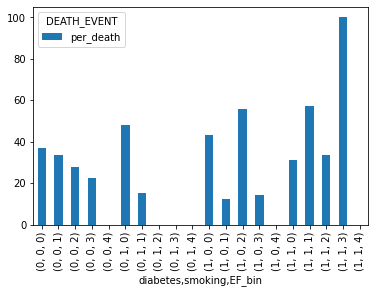

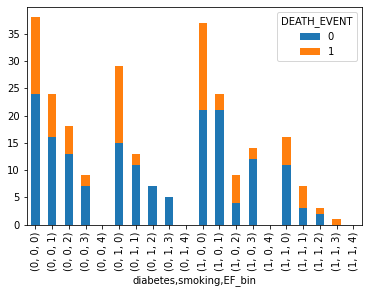

In [38]:
# getting the distribution
dist = train.groupby(['diabetes','smoking','EF_bin', 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack().fillna(0)
dist['per_death'] = dist[1]/(dist[0]+dist[1])*100
dist[['per_death']].plot(kind='bar')
dist[[0,1]].plot(kind='bar', stacked=True)

In here, we can see a pure set, where the person has diabetes, is smoking and falls under the EF_bin of 3 which is normal range, has death percentage as 100%. But this is not helpful as the number of persons is very less so we cannot say that this is a pattern.

__serum_creatinine__

In [39]:
# serum_creatinine
train.serum_creatinine.describe().to_frame().style.background_gradient(cmap='twilight_shifted')

In [40]:
# serum_sodium
train.serum_sodium.describe().to_frame().style.background_gradient(cmap='twilight')

__MULTIVARIATE ANALYSIS__

In [41]:
train.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT',
 'age_bin',
 'normal_creatinine_phosphokinase',
 'creatinine_phosphokinase_bin',
 'EF_bin']

In [42]:
# parallel plot for continuous variable
fig = px.parallel_coordinates(train, color="DEATH_EVENT",
                              dimensions=['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
                                          'DEATH_EVENT'
                                         ],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

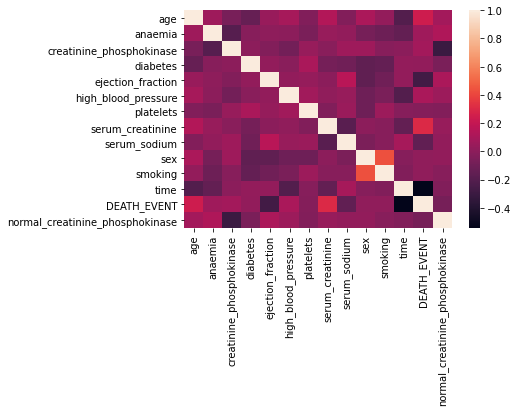

In [43]:
sns.heatmap(train.corr())

***
## <font color = '#A018F0'> Feature Engineering </font>
***

In [44]:
# getting the train columns
train.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT',
 'age_bin',
 'normal_creatinine_phosphokinase',
 'creatinine_phosphokinase_bin',
 'EF_bin']

In [45]:
continuous_variables = [
 'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium'
]

target = ['DEATH_EVENT']

categorical_variables = [
 'anaemia',
 'diabetes',
 'high_blood_pressure',
 'sex',
 'smoking',
 'time',
 'age_bin',
 'normal_creatinine_phosphokinase',
 'creatinine_phosphokinase_bin',
 'EF_bin'
]

In [46]:
# scaling the continuous variables
autoscaler = PowerTransformer()
train[continuous_variables] = autoscaler.fit_transform(train[continuous_variables])
test[continuous_variables] = autoscaler.transform(test[continuous_variables])

In [47]:
# visualising the final transformed continuous variables.
# Group data together
hist_data = [train.age, train.creatinine_phosphokinase, train.ejection_fraction, 
             train.platelets, train.serum_creatinine, train.serum_sodium]

group_labels = ['Age', 'Creatinine Phosphokinase', 'Ejection Fraction', 'Platelets', 'Serum Creatinine', 
                'Serum Sodium']

colors = ['#FA93A0', '#19FFFA', '#51F04B',
                '#F06318', '#A018F0', '#3222E3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.4, colors = colors, show_hist=False)
fig.show()

Now we can get a fairly normal distributions of continuous variables, we can now move onto the feature selection phase.

***
## <font color='#52254E'>Feature Selection, Model Building and Hyper Parameters Tuning</font>
***

In [48]:
# remove highly correlated features
# Create correlation matrix
corr_matrix = train[continuous_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# print the columns to be dropped off
to_drop

[]

In [49]:
# train datatypes
train.dtypes

age                                 float64
anaemia                               int64
creatinine_phosphokinase            float64
diabetes                              int64
ejection_fraction                   float64
high_blood_pressure                   int64
platelets                           float64
serum_creatinine                    float64
serum_sodium                        float64
sex                                   int64
smoking                               int64
time                                  int64
DEATH_EVENT                           int64
age_bin                            category
normal_creatinine_phosphokinase       int64
creatinine_phosphokinase_bin       category
EF_bin                             category
dtype: object

In [50]:
# changing to int type
train['age_bin'] = train['age_bin'].astype(int)
train['creatinine_phosphokinase_bin'] = train['creatinine_phosphokinase_bin'].astype(int)
train['EF_bin'] = train['EF_bin'].astype(int)

test['age_bin'] = test['age_bin'].astype(int)
test['creatinine_phosphokinase_bin'] = test['creatinine_phosphokinase_bin'].astype(int)
test['EF_bin'] = test['EF_bin'].astype(int)

In [51]:
features = [
 'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'anaemia',
 'diabetes',
 'high_blood_pressure',
 'sex',
 'smoking',
 'time',
 'age_bin',
 'normal_creatinine_phosphokinase',
 'creatinine_phosphokinase_bin',
 'EF_bin'
]

In [52]:
# Choosing best base model for trainset.
ensembles = []
ensembles.append(('GBM', GradientBoostingClassifier(n_estimators = 300)))
ensembles.append(('RF', RandomForestClassifier(n_estimators = 300)))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', XGBClassifier(n_estimators = 300, n_jobs=-1)))
ensembles.append(('LR', LogisticRegressionCV(cv = 5)))
ensembles.append(('GNB', GaussianNB()))
ensembles.append(('BNB', BernoulliNB()))
ensembles.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
ensembles.append(('DT', DecisionTreeClassifier()))
ensembles.append(('LGMB', LGBMClassifier(n_estimators = 300, class_weight = 'balanced', n_jobs = -1)))
#ensembles.append(('CBC', CatBoostClassifier(cat_features = categorical_variables, class_weights = 'SqrtBalanced')))

train_set = train[features]
test_set = test[features]

results = []
names = []
for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state=42)
    cv_results = cross_val_score(model, train_set, train[target],
                                 cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model = model.fit(train_set, train[target])
    # validating the training results on validation sets.
    predicted_result = model.predict(test_set)
    print("Confusion Matrix: ", confusion_matrix(test[target], predicted_result), "\n")
    print("Classification Report: \n", classification_report(test[target], predicted_result), "\n")

GBM: 0.914167 (0.022143)
Confusion Matrix:  [[27  4]
 [ 6  8]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.67      0.57      0.62        14

    accuracy                           0.78        45
   macro avg       0.74      0.72      0.73        45
weighted avg       0.77      0.78      0.77        45
 

RF: 0.919203 (0.020562)
Confusion Matrix:  [[28  3]
 [ 6  8]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        31
           1       0.73      0.57      0.64        14

    accuracy                           0.80        45
   macro avg       0.78      0.74      0.75        45
weighted avg       0.79      0.80      0.79        45
 

ET: 0.896907 (0.027724)
Confusion Matrix:  [[28  3]
 [ 8  6]] 

Classification Report: 
               precision    recall  f1-score   support

           0       

<font color='green'><b>Here, LGBM is giving an auc score of 0.904 which is great and the accuracy is 82%!!</b></font>

In [53]:
# lets lokk at how catboost classifier is doing on this small dataset.
model = CatBoostClassifier(cat_features = categorical_variables,
                          loss_function = 'Logloss',
                           custom_metric = ['AUC', 'F1'],
                           eval_metric = 'AUC',
                           bootstrap_type = 'Bernoulli',
                           use_best_model = True,
                           leaf_estimation_method = 'Newton',
                           auto_class_weights = 'SqrtBalanced',
                           boosting_type = 'Ordered'
                          )
model = model.fit(train_set, train[target], eval_set = (test_set, test[target]))
# validating the training results on validation sets.
predicted_result = model.predict(test_set)
print("Confusion Matrix: ", confusion_matrix(test[target], predicted_result), "\n")
print("Classification Report: \n", classification_report(test[target], predicted_result), "\n")

0:	test: 0.7085253	best: 0.7085253 (0)	total: 69.4ms	remaining: 1m 9s
1:	test: 0.7407834	best: 0.7407834 (1)	total: 76.1ms	remaining: 38s
2:	test: 0.7142857	best: 0.7407834 (1)	total: 81.5ms	remaining: 27.1s
3:	test: 0.7050691	best: 0.7407834 (1)	total: 86ms	remaining: 21.4s
4:	test: 0.7119816	best: 0.7407834 (1)	total: 96.8ms	remaining: 19.3s
5:	test: 0.7108295	best: 0.7407834 (1)	total: 104ms	remaining: 17.2s
6:	test: 0.7062212	best: 0.7407834 (1)	total: 111ms	remaining: 15.7s
7:	test: 0.7269585	best: 0.7407834 (1)	total: 116ms	remaining: 14.4s
8:	test: 0.7258065	best: 0.7407834 (1)	total: 125ms	remaining: 13.8s
9:	test: 0.7258065	best: 0.7407834 (1)	total: 133ms	remaining: 13.1s
10:	test: 0.7281106	best: 0.7407834 (1)	total: 140ms	remaining: 12.6s
11:	test: 0.7304147	best: 0.7407834 (1)	total: 149ms	remaining: 12.3s
12:	test: 0.7304147	best: 0.7407834 (1)	total: 153ms	remaining: 11.6s
13:	test: 0.7327189	best: 0.7407834 (1)	total: 163ms	remaining: 11.4s
14:	test: 0.7281106	best: 0.7

123:	test: 0.7718894	best: 0.7741935 (91)	total: 810ms	remaining: 5.72s
124:	test: 0.7718894	best: 0.7741935 (91)	total: 813ms	remaining: 5.69s
125:	test: 0.7718894	best: 0.7741935 (91)	total: 818ms	remaining: 5.67s
126:	test: 0.7741935	best: 0.7741935 (91)	total: 826ms	remaining: 5.67s
127:	test: 0.7741935	best: 0.7741935 (91)	total: 838ms	remaining: 5.71s
128:	test: 0.7741935	best: 0.7741935 (91)	total: 846ms	remaining: 5.71s
129:	test: 0.7741935	best: 0.7741935 (91)	total: 852ms	remaining: 5.7s
130:	test: 0.7741935	best: 0.7741935 (91)	total: 854ms	remaining: 5.67s
131:	test: 0.7741935	best: 0.7741935 (91)	total: 864ms	remaining: 5.68s
132:	test: 0.7741935	best: 0.7741935 (91)	total: 875ms	remaining: 5.7s
133:	test: 0.7741935	best: 0.7741935 (91)	total: 879ms	remaining: 5.68s
134:	test: 0.7741935	best: 0.7741935 (91)	total: 884ms	remaining: 5.66s
135:	test: 0.7741935	best: 0.7741935 (91)	total: 889ms	remaining: 5.65s
136:	test: 0.7764977	best: 0.7764977 (136)	total: 893ms	remaining:

237:	test: 0.7788018	best: 0.7857143 (212)	total: 1.56s	remaining: 5.01s
238:	test: 0.7788018	best: 0.7857143 (212)	total: 1.57s	remaining: 5.01s
239:	test: 0.7788018	best: 0.7857143 (212)	total: 1.59s	remaining: 5.03s
240:	test: 0.7834101	best: 0.7857143 (212)	total: 1.59s	remaining: 5.02s
241:	test: 0.7834101	best: 0.7857143 (212)	total: 1.6s	remaining: 5.01s
242:	test: 0.7811060	best: 0.7857143 (212)	total: 1.61s	remaining: 5.01s
243:	test: 0.7811060	best: 0.7857143 (212)	total: 1.62s	remaining: 5.02s
244:	test: 0.7811060	best: 0.7857143 (212)	total: 1.63s	remaining: 5.01s
245:	test: 0.7811060	best: 0.7857143 (212)	total: 1.64s	remaining: 5.01s
246:	test: 0.7811060	best: 0.7857143 (212)	total: 1.64s	remaining: 5.01s
247:	test: 0.7811060	best: 0.7857143 (212)	total: 1.65s	remaining: 5.01s
248:	test: 0.7788018	best: 0.7857143 (212)	total: 1.66s	remaining: 5s
249:	test: 0.7764977	best: 0.7857143 (212)	total: 1.67s	remaining: 5.01s
250:	test: 0.7718894	best: 0.7857143 (212)	total: 1.67s

352:	test: 0.7764977	best: 0.7857143 (212)	total: 2.7s	remaining: 4.96s
353:	test: 0.7788018	best: 0.7857143 (212)	total: 2.71s	remaining: 4.96s
354:	test: 0.7788018	best: 0.7857143 (212)	total: 2.73s	remaining: 4.95s
355:	test: 0.7788018	best: 0.7857143 (212)	total: 2.73s	remaining: 4.95s
356:	test: 0.7788018	best: 0.7857143 (212)	total: 2.75s	remaining: 4.95s
357:	test: 0.7764977	best: 0.7857143 (212)	total: 2.76s	remaining: 4.94s
358:	test: 0.7811060	best: 0.7857143 (212)	total: 2.77s	remaining: 4.94s
359:	test: 0.7811060	best: 0.7857143 (212)	total: 2.77s	remaining: 4.93s
360:	test: 0.7811060	best: 0.7857143 (212)	total: 2.79s	remaining: 4.94s
361:	test: 0.7764977	best: 0.7857143 (212)	total: 2.8s	remaining: 4.93s
362:	test: 0.7764977	best: 0.7857143 (212)	total: 2.81s	remaining: 4.94s
363:	test: 0.7764977	best: 0.7857143 (212)	total: 2.83s	remaining: 4.94s
364:	test: 0.7764977	best: 0.7857143 (212)	total: 2.83s	remaining: 4.93s
365:	test: 0.7764977	best: 0.7857143 (212)	total: 2.8

467:	test: 0.7764977	best: 0.7857143 (212)	total: 3.96s	remaining: 4.5s
468:	test: 0.7741935	best: 0.7857143 (212)	total: 3.97s	remaining: 4.49s
469:	test: 0.7741935	best: 0.7857143 (212)	total: 3.97s	remaining: 4.48s
470:	test: 0.7764977	best: 0.7857143 (212)	total: 3.98s	remaining: 4.48s
471:	test: 0.7741935	best: 0.7857143 (212)	total: 3.99s	remaining: 4.47s
472:	test: 0.7718894	best: 0.7857143 (212)	total: 4s	remaining: 4.46s
473:	test: 0.7741935	best: 0.7857143 (212)	total: 4.01s	remaining: 4.45s
474:	test: 0.7741935	best: 0.7857143 (212)	total: 4.02s	remaining: 4.44s
475:	test: 0.7741935	best: 0.7857143 (212)	total: 4.03s	remaining: 4.43s
476:	test: 0.7764977	best: 0.7857143 (212)	total: 4.04s	remaining: 4.43s
477:	test: 0.7764977	best: 0.7857143 (212)	total: 4.04s	remaining: 4.42s
478:	test: 0.7764977	best: 0.7857143 (212)	total: 4.05s	remaining: 4.41s
479:	test: 0.7741935	best: 0.7857143 (212)	total: 4.06s	remaining: 4.4s
480:	test: 0.7741935	best: 0.7857143 (212)	total: 4.07s	

580:	test: 0.7741935	best: 0.7857143 (212)	total: 5.12s	remaining: 3.69s
581:	test: 0.7718894	best: 0.7857143 (212)	total: 5.13s	remaining: 3.68s
582:	test: 0.7741935	best: 0.7857143 (212)	total: 5.14s	remaining: 3.67s
583:	test: 0.7741935	best: 0.7857143 (212)	total: 5.15s	remaining: 3.67s
584:	test: 0.7741935	best: 0.7857143 (212)	total: 5.16s	remaining: 3.66s
585:	test: 0.7718894	best: 0.7857143 (212)	total: 5.17s	remaining: 3.65s
586:	test: 0.7741935	best: 0.7857143 (212)	total: 5.18s	remaining: 3.64s
587:	test: 0.7718894	best: 0.7857143 (212)	total: 5.18s	remaining: 3.63s
588:	test: 0.7718894	best: 0.7857143 (212)	total: 5.2s	remaining: 3.63s
589:	test: 0.7695853	best: 0.7857143 (212)	total: 5.21s	remaining: 3.62s
590:	test: 0.7695853	best: 0.7857143 (212)	total: 5.21s	remaining: 3.61s
591:	test: 0.7695853	best: 0.7857143 (212)	total: 5.22s	remaining: 3.6s
592:	test: 0.7718894	best: 0.7857143 (212)	total: 5.23s	remaining: 3.59s
593:	test: 0.7718894	best: 0.7857143 (212)	total: 5.2

703:	test: 0.7672811	best: 0.7857143 (212)	total: 6.52s	remaining: 2.74s
704:	test: 0.7672811	best: 0.7857143 (212)	total: 6.53s	remaining: 2.73s
705:	test: 0.7672811	best: 0.7857143 (212)	total: 6.54s	remaining: 2.73s
706:	test: 0.7672811	best: 0.7857143 (212)	total: 6.56s	remaining: 2.72s
707:	test: 0.7672811	best: 0.7857143 (212)	total: 6.57s	remaining: 2.71s
708:	test: 0.7672811	best: 0.7857143 (212)	total: 6.58s	remaining: 2.7s
709:	test: 0.7672811	best: 0.7857143 (212)	total: 6.59s	remaining: 2.69s
710:	test: 0.7672811	best: 0.7857143 (212)	total: 6.61s	remaining: 2.69s
711:	test: 0.7672811	best: 0.7857143 (212)	total: 6.62s	remaining: 2.68s
712:	test: 0.7672811	best: 0.7857143 (212)	total: 6.63s	remaining: 2.67s
713:	test: 0.7672811	best: 0.7857143 (212)	total: 6.63s	remaining: 2.66s
714:	test: 0.7672811	best: 0.7857143 (212)	total: 6.65s	remaining: 2.65s
715:	test: 0.7672811	best: 0.7857143 (212)	total: 6.66s	remaining: 2.64s
716:	test: 0.7672811	best: 0.7857143 (212)	total: 6.

829:	test: 0.7718894	best: 0.7857143 (212)	total: 7.93s	remaining: 1.62s
830:	test: 0.7718894	best: 0.7857143 (212)	total: 7.94s	remaining: 1.61s
831:	test: 0.7718894	best: 0.7857143 (212)	total: 7.95s	remaining: 1.61s
832:	test: 0.7718894	best: 0.7857143 (212)	total: 7.96s	remaining: 1.6s
833:	test: 0.7718894	best: 0.7857143 (212)	total: 7.98s	remaining: 1.59s
834:	test: 0.7718894	best: 0.7857143 (212)	total: 7.99s	remaining: 1.58s
835:	test: 0.7718894	best: 0.7857143 (212)	total: 8s	remaining: 1.57s
836:	test: 0.7718894	best: 0.7857143 (212)	total: 8.01s	remaining: 1.56s
837:	test: 0.7718894	best: 0.7857143 (212)	total: 8.02s	remaining: 1.55s
838:	test: 0.7718894	best: 0.7857143 (212)	total: 8.03s	remaining: 1.54s
839:	test: 0.7718894	best: 0.7857143 (212)	total: 8.04s	remaining: 1.53s
840:	test: 0.7718894	best: 0.7857143 (212)	total: 8.05s	remaining: 1.52s
841:	test: 0.7718894	best: 0.7857143 (212)	total: 8.06s	remaining: 1.51s
842:	test: 0.7718894	best: 0.7857143 (212)	total: 8.06s

952:	test: 0.7672811	best: 0.7857143 (212)	total: 9.14s	remaining: 451ms
953:	test: 0.7672811	best: 0.7857143 (212)	total: 9.14s	remaining: 441ms
954:	test: 0.7672811	best: 0.7857143 (212)	total: 9.16s	remaining: 431ms
955:	test: 0.7672811	best: 0.7857143 (212)	total: 9.17s	remaining: 422ms
956:	test: 0.7672811	best: 0.7857143 (212)	total: 9.18s	remaining: 412ms
957:	test: 0.7672811	best: 0.7857143 (212)	total: 9.18s	remaining: 403ms
958:	test: 0.7649770	best: 0.7857143 (212)	total: 9.2s	remaining: 393ms
959:	test: 0.7649770	best: 0.7857143 (212)	total: 9.21s	remaining: 384ms
960:	test: 0.7649770	best: 0.7857143 (212)	total: 9.21s	remaining: 374ms
961:	test: 0.7649770	best: 0.7857143 (212)	total: 9.22s	remaining: 364ms
962:	test: 0.7649770	best: 0.7857143 (212)	total: 9.23s	remaining: 355ms
963:	test: 0.7626728	best: 0.7857143 (212)	total: 9.24s	remaining: 345ms
964:	test: 0.7626728	best: 0.7857143 (212)	total: 9.25s	remaining: 335ms
965:	test: 0.7626728	best: 0.7857143 (212)	total: 9.

It is not doing great, though it reduces overfitting but the overall score is very bad.

In [54]:
# lets try voting classifier by ensembling some moderately and best performing models.
# voting ensembler soft and hard for dataset
ensembles = []
ensembles.append(('RF', RandomForestClassifier(n_estimators = 300)))
ensembles.append(('XGB', XGBClassifier(n_estimators = 300, n_jobs=-1)))
ensembles.append(('LGMB', LGBMClassifier(n_estimators = 300, class_weight = 'balanced', n_jobs = -1)))
ensembles.append(('LR', LogisticRegressionCV(cv = 3)))

# Voting classifier soft
vc_soft = VotingClassifier(estimators=ensembles, voting='soft', flatten_transform=True)
vc_soft.fit(train_set, train[target])
# validating the training results on validation sets.
print("###### Voting Classifier - Soft #######")
predicted_result = model.predict(test_set)
print("Confusion Matrix: ", confusion_matrix(test[target], predicted_result), "\n")
print("Classification Report: \n", classification_report(test[target], predicted_result), "\n")

# Voting classifier hard
print("###### Voting Classifier - Hard #######")
vc_hard = VotingClassifier(estimators=ensembles, voting='hard')
vc_hard.fit(train_set, train[target])
predicted_result = model.predict(test_set)
print("Confusion Matrix: ", confusion_matrix(test[target], predicted_result), "\n")
print("Classification Report: \n", classification_report(test[target], predicted_result), "\n")

###### Voting Classifier - Soft #######
Confusion Matrix:  [[24  7]
 [ 6  8]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.53      0.57      0.55        14

    accuracy                           0.71        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.72      0.71      0.71        45
 

###### Voting Classifier - Hard #######
Confusion Matrix:  [[24  7]
 [ 6  8]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.53      0.57      0.55        14

    accuracy                           0.71        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.72      0.71      0.71        45
 



Again, we can see that the voting classifier is also not doing great.

<font color = 'green'><b>LGBMClassifier is performing quite well so I will pick that as my base model.</b></font>

In [55]:
# forward selections
# getting the features from forward selection methods
print("**************************************************")
# initialising the SequentialFeatureSelector
kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state=42)
sfs = SequentialFeatureSelector(LGBMClassifier(n_estimators = 300, class_weight = 'balanced', n_jobs = -1), 
           k_features=5, 
           forward=True, 
           floating=False,
           scoring='roc_auc',
           cv=kfold)

# fit the object to the training data.
sfs.fit(train_set, train[target])

# print the selected features.
selected_features = train_set.columns[list(sfs.k_feature_idx_)]
print(selected_features)

# print the final prediction score.
print(sfs.k_score_)
print("**************************************************")
sfs.subsets_

**************************************************
Index(['ejection_fraction', 'serum_creatinine', 'serum_sodium',
       'high_blood_pressure', 'time'],
      dtype='object')
0.9309950056068225
**************************************************


{1: {'feature_idx': (11,),
  'cv_scores': array([0.84386973, 0.8862782 , 0.83398311]),
  'avg_score': 0.8547103444008061,
  'feature_names': ('time',)},
 2: {'feature_idx': (2, 11),
  'cv_scores': array([0.90772669, 0.94830827, 0.85152697]),
  'avg_score': 0.9025206428160653,
  'feature_names': ('ejection_fraction', 'time')},
 3: {'feature_idx': (2, 4, 11),
  'cv_scores': array([0.92975734, 0.93609023, 0.88174139]),
  'avg_score': 0.915862986542559,
  'feature_names': ('ejection_fraction', 'serum_creatinine', 'time')},
 4: {'feature_idx': (2, 4, 5, 11),
  'cv_scores': array([0.92720307, 0.95175439, 0.89668616]),
  'avg_score': 0.9252145369810222,
  'feature_names': ('ejection_fraction',
   'serum_creatinine',
   'serum_sodium',
   'time')},
 5: {'feature_idx': (2, 4, 5, 8, 11),
  'cv_scores': array([0.93742018, 0.95238095, 0.90318389]),
  'avg_score': 0.9309950056068225,
  'feature_names': ('ejection_fraction',
   'serum_creatinine',
   'serum_sodium',
   'high_blood_pressure',
   'tim

In [56]:
filtered = [
   'ejection_fraction',
   'serum_creatinine',
   'sex',
   'time',
   'creatinine_phosphokinase_bin'
]

Confusion Matrix:  [[29  2]
 [ 5  9]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.82      0.64      0.72        14

    accuracy                           0.84        45
   macro avg       0.84      0.79      0.81        45
weighted avg       0.84      0.84      0.84        45
 



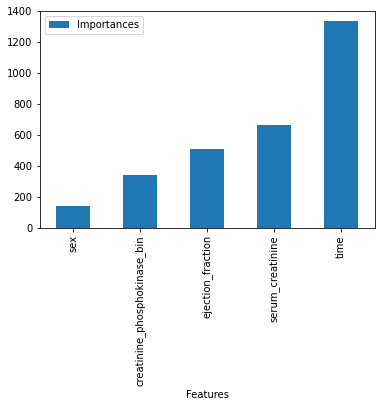

In [57]:
# trying embedded methods also
# Embedded Feature Selection usinf RF classifier.

model = LGBMClassifier(n_estimators = 300, class_weight = 'balanced', n_jobs = -1)

# fit the model to start training.
model.fit(train_set[filtered], train[target])

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": train_set[filtered].columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
final_df.plot.bar(x = 'Features') 

# predict the result
predicted_result = model.predict(test_set[filtered])
print("Confusion Matrix: ", confusion_matrix(test[target], predicted_result), "\n")
print("Classification Report: \n", classification_report(test[target], predicted_result), "\n")

In [58]:
# training the hypertuned model
model = LGBMClassifier(boosting_type = 'gbdt',
                       class_weight = 'balanced',
                       learning_rate = 0.1,
                       n_estimators = 300,
                       n_jobs = -1,
                       num_leaves = 31,
                       objective = 'binary',
                       reg_alpha = 0,
                       reg_lambda = 0)

model = model.fit(train_set[filtered], train[target])
# predict the result
predicted_result = model.predict(test_set[filtered])
print("Confusion Matrix: ", confusion_matrix(test[target], predicted_result), "\n")
print("Classification Report: \n", classification_report(test[target], predicted_result), "\n")

Confusion Matrix:  [[29  2]
 [ 5  9]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.82      0.64      0.72        14

    accuracy                           0.84        45
   macro avg       0.84      0.79      0.81        45
weighted avg       0.84      0.84      0.84        45
 



In [59]:
test['predicted_result'] = predicted_result
test['predicted_result'].head().to_frame().style.background_gradient(cmap='OrRd_r')

<font color = 'green'><b>This is the final predictions of the dataset. I reached an ROC AUC score of 0.91 and accuracy of 87%!!!</b></font>
***
Hope you enjoyed it!!!
***
# THE END
***